In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/output.csv')

In [3]:
sales_data = data[data['category']=='total_net_sales']
sales_data['value'] = sales_data['value'].astype(float)

/var/folders/3_/9l8k0s297fvfm4ymcnc68wkh0000gq/T/ipykernel_78353/3838144427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['value'] = sales_data['value'].astype(float)


Text(0.5, 1.0, 'Tulia Sales Data')

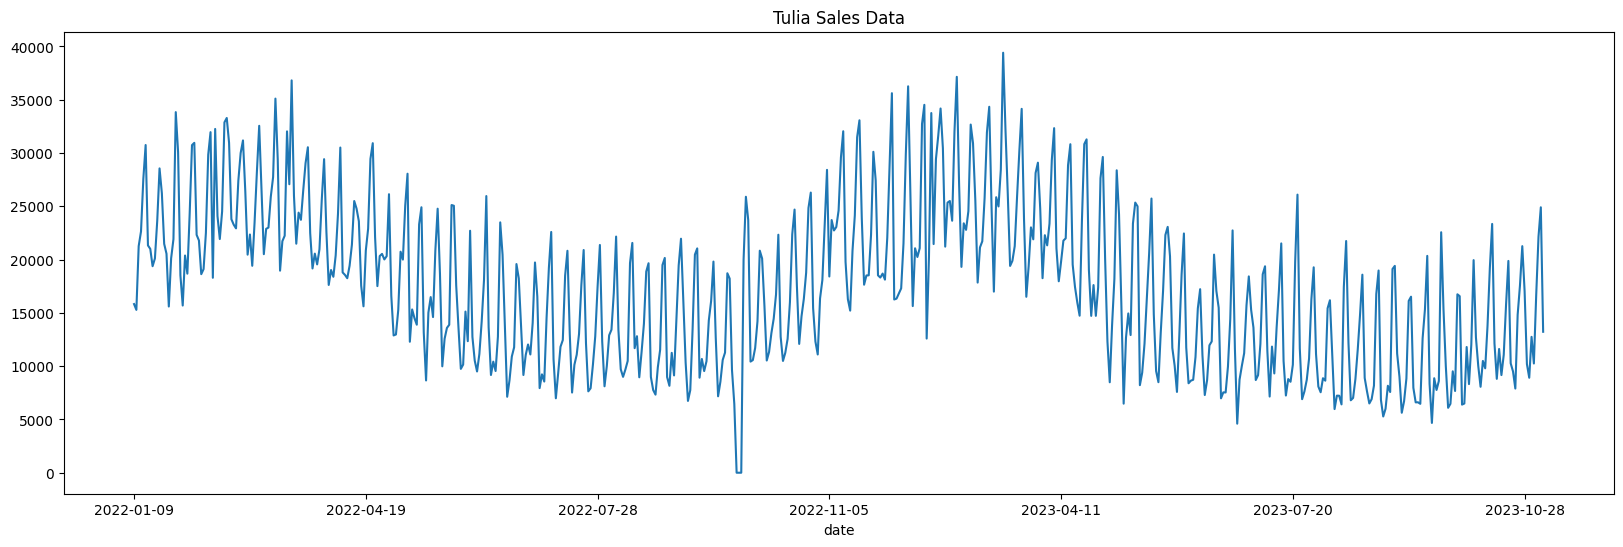

In [4]:
sales_data.sort_values('date',ascending=True).set_index('date')['value'].plot(figsize=(20,6))
plt.title('Tulia Sales Data')


AttributeError: 'Series' object has no attribute 'weekday'

In [5]:
from datetime import timedelta 

sales_data['date'] = pd.to_datetime(sales_data['date'])
sales_data['week'] = sales_data['date'] - pd.to_timedelta(sales_data['date'].dt.dayofweek, unit='d')

/var/folders/3_/9l8k0s297fvfm4ymcnc68wkh0000gq/T/ipykernel_78353/1987234967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['date'] = pd.to_datetime(sales_data['date'])
/var/folders/3_/9l8k0s297fvfm4ymcnc68wkh0000gq/T/ipykernel_78353/1987234967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['week'] = sales_data['date'] - pd.to_timedelta(sales_data['date'].dt.dayofweek, unit='d')


In [46]:
sales_data['week_total'] = sales_data.groupby('week')['value'].transform('sum')
sales_data['weekly_perc'] = sales_data['value'] / sales_data['week_total']

/var/folders/3_/9l8k0s297fvfm4ymcnc68wkh0000gq/T/ipykernel_70247/3871653176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['week_total'] = sales_data.groupby('week')['value'].transform('sum')
/var/folders/3_/9l8k0s297fvfm4ymcnc68wkh0000gq/T/ipykernel_70247/3871653176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['weekly_perc'] = sales_data['value'] / sales_data['week_total']


In [7]:
sales_data['weekday'] = sales_data['date'].dt.dayofweek
sales_data['weekday_name'] = sales_data['date'].dt.weekday
sales_data['yearday'] = sales_data['date'].dt.day_of_year
sales_data['year'] = sales_data['date'].dt.year




/var/folders/3_/9l8k0s297fvfm4ymcnc68wkh0000gq/T/ipykernel_78353/857342514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['weekday'] = sales_data['date'].dt.dayofweek
/var/folders/3_/9l8k0s297fvfm4ymcnc68wkh0000gq/T/ipykernel_78353/857342514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['weekday_name'] = sales_data['date'].dt.weekday
/var/folders/3_/9l8k0s297fvfm4ymcnc68wkh0000gq/T/ipykernel_78353/857342514.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy

<Axes: xlabel='index'>

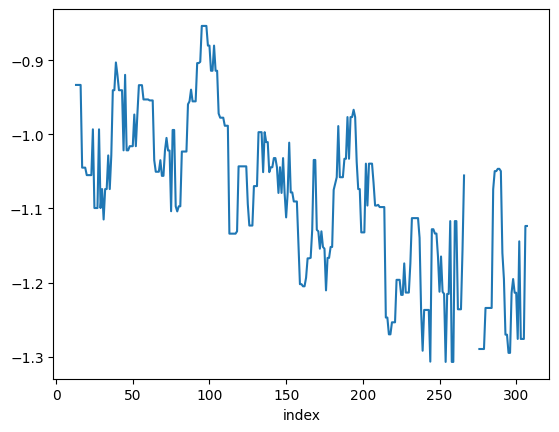

In [22]:
yearly_data = sales_data[sales_data['category']=='total_net_sales'].groupby(['year','yearday'])['value'].sum().unstack(level=0).reset_index()

yearly_data['yoy_growth'] = yearly_data[2023] - yearly_data[2022]

yearly_cumulative = yearly_data.groupby('yearday').cumsum().reset_index() 
yearly_cumulative['yoy_growth_cum'] = yearly_cumulative['yoy_growth'] / yearly_cumulative[2022] - 1

yearly_cumulative.set_index('index')['yoy_growth_cum'].rolling(7).median().plot()


In [12]:
sales_data.head()

,Unnamed: 0,date,category,value,week,weekday,weekday_name,yearday,year
49,49,2023-10-30,total_net_sales,8910.70,2023-10-30,0,0,303,2023
50,50,2023-10-31,total_net_sales,12748.55,2023-10-30,1,1,304,2023
51,51,2023-11-01,total_net_sales,10247.61,2023-10-30,2,2,305,2023
52,52,2023-11-02,total_net_sales,16628.70,2023-10-30,3,3,306,2023
53,53,2023-11-03,total_net_sales,22156.94,2023-10-30,4,4,307,2023


In [ ]:
sales_data['weekday_name']

<Axes: xlabel='weekday_name'>

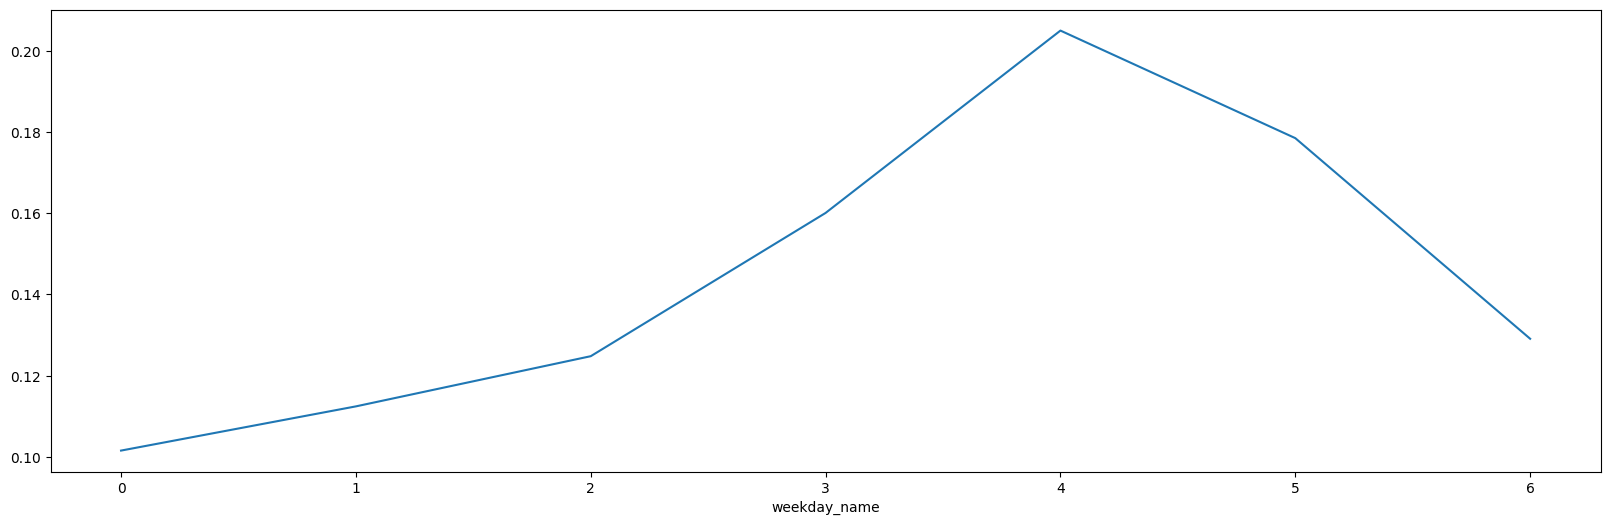

In [69]:
sales_data.sort_values('date',ascending = True).groupby('weekday_name').weekly_perc.mean().plot(figsize=(20,6))

<Axes: xlabel='weekday_name'>

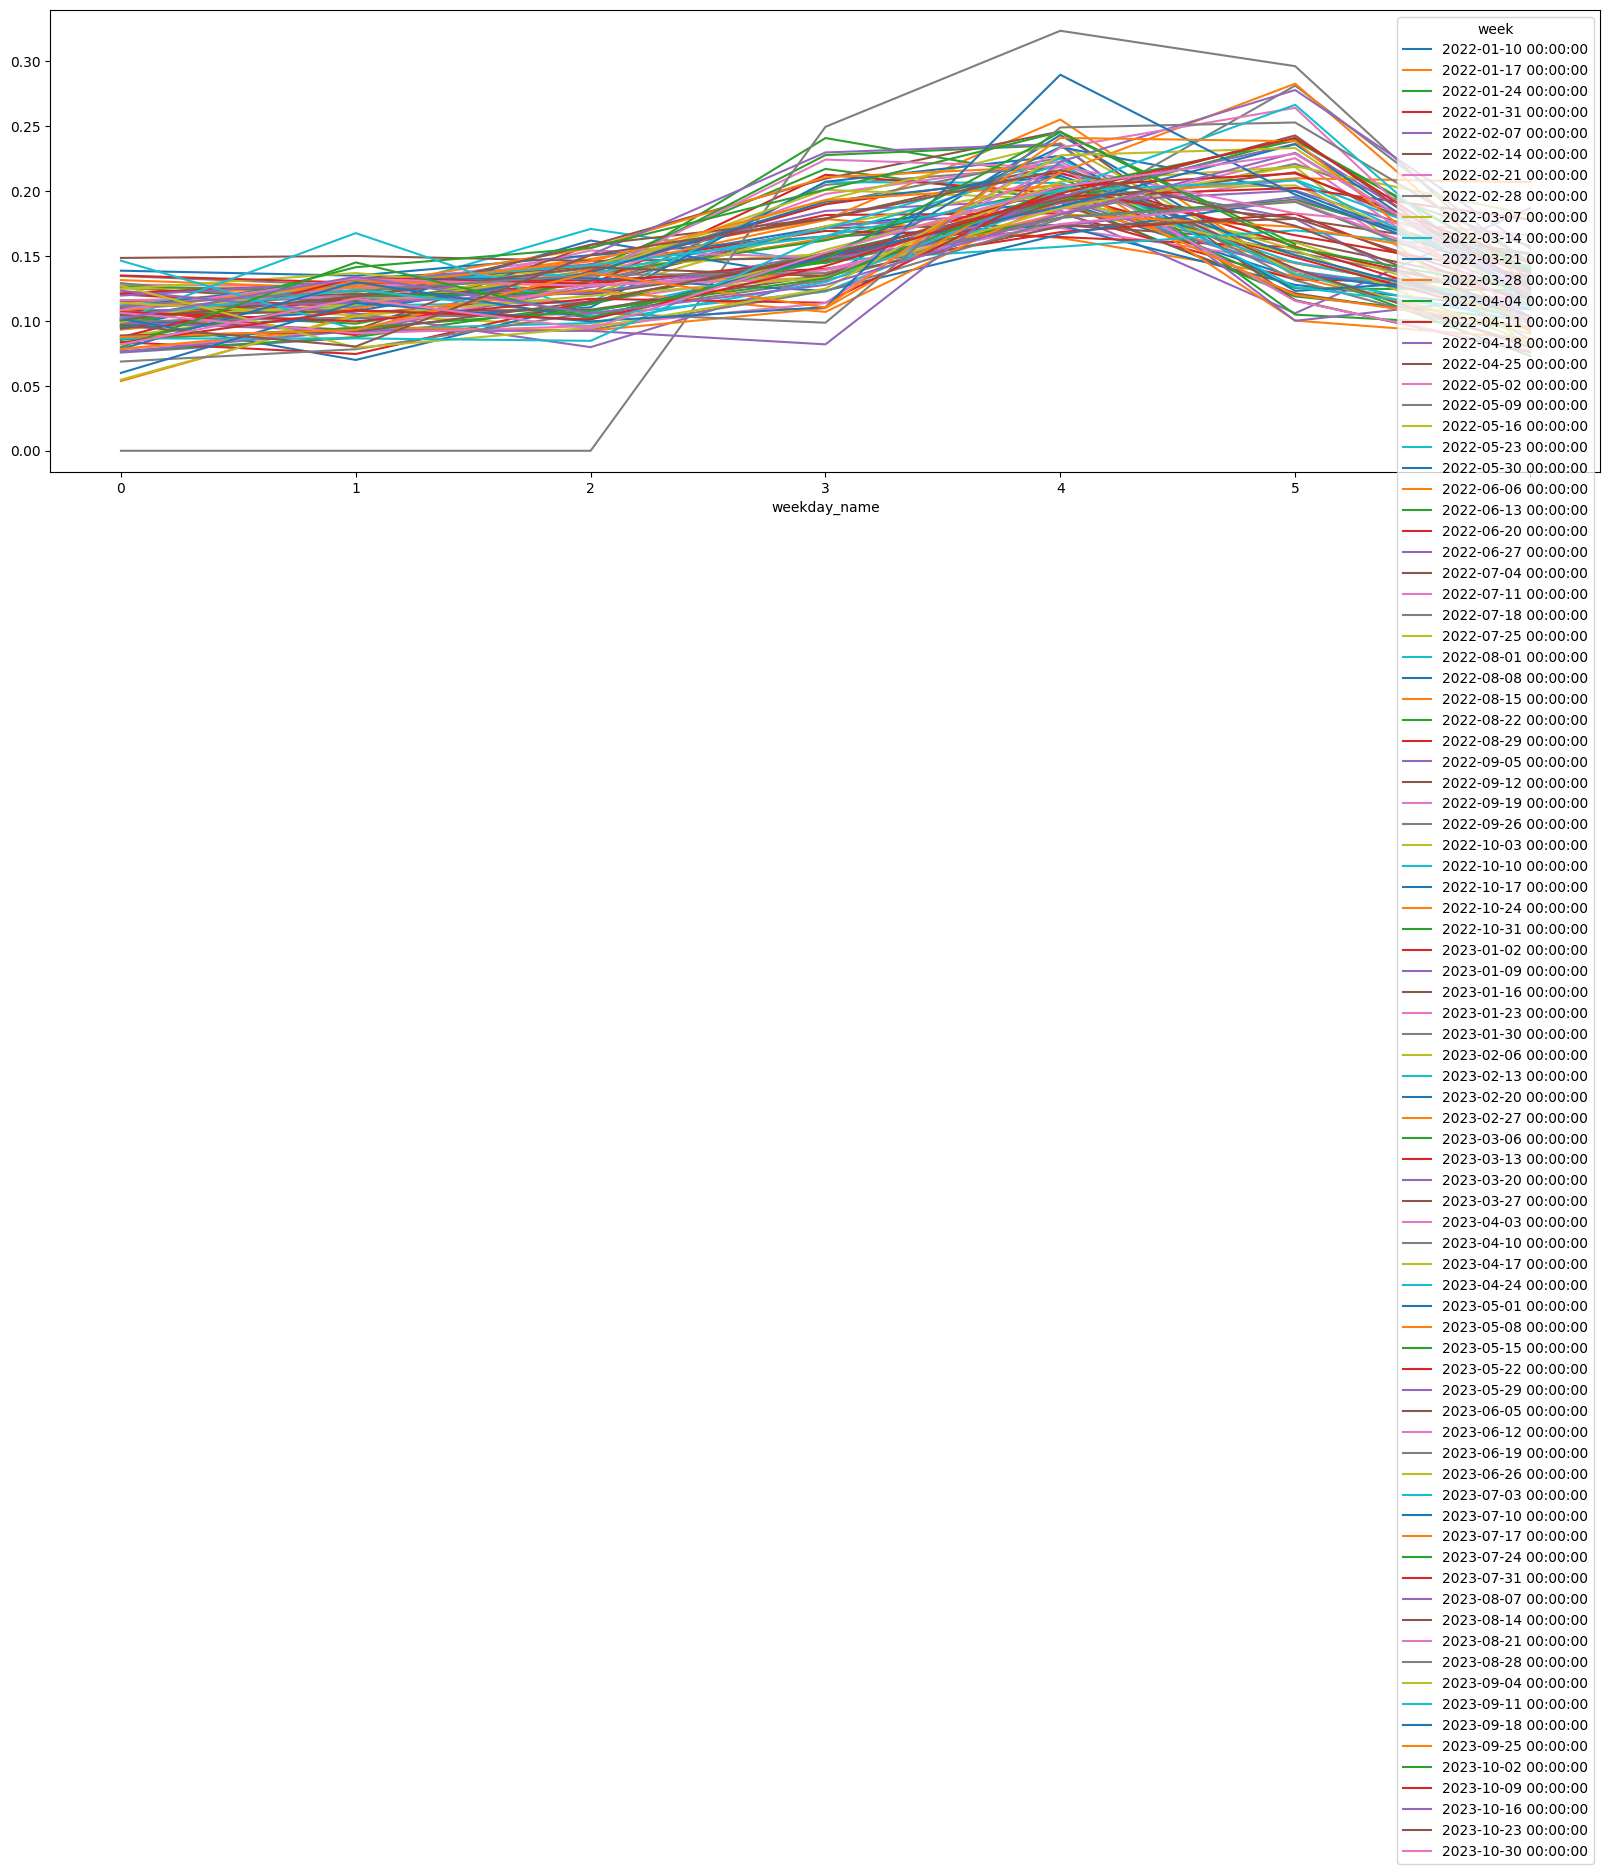

In [73]:
sales_data[sales_data['date']>='2022-01-10'].set_index(['weekday_name','week'])['weekly_perc'].unstack(level=1).plot(figsize=(20,6))

<Axes: xlabel='yearday'>

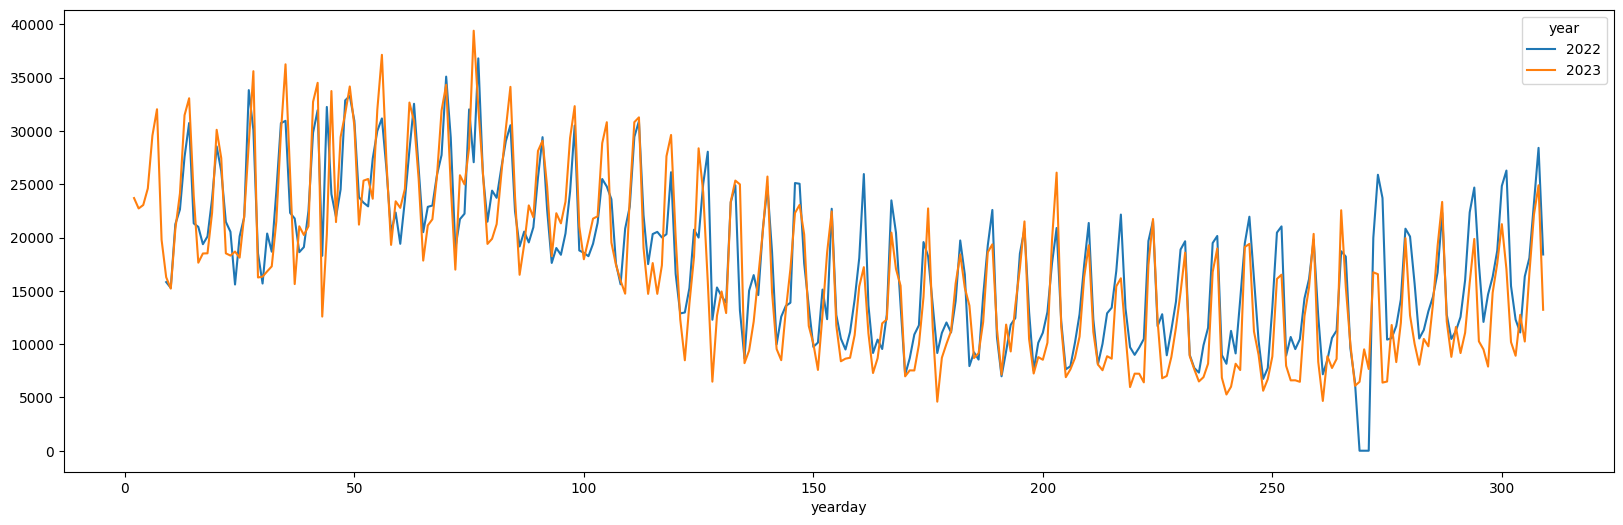

In [86]:
sales_data.groupby(['yearday','year'])['value'].sum().unstack(level=1).plot(figsize=(20,6))

In [83]:
data[data['date']<'2023-01-01'].date.max()

'2022-11-05'

In [57]:
sales_data.head()

,Unnamed: 0,date,category,value,weekday,week,week_total,weekly_perc,weekday_name
49,49,2023-10-30,total_net_sales,8910.70,0,2023-10-30,108821.19,0.081884,<bound method PandasDelegate._add_delegate_acc...
50,50,2023-10-31,total_net_sales,12748.55,1,2023-10-30,108821.19,0.117151,<bound method PandasDelegate._add_delegate_acc...
51,51,2023-11-01,total_net_sales,10247.61,2,2023-10-30,108821.19,0.094169,<bound method PandasDelegate._add_delegate_acc...
52,52,2023-11-02,total_net_sales,16628.70,3,2023-10-30,108821.19,0.152808,<bound method PandasDelegate._add_delegate_acc...
53,53,2023-11-03,total_net_sales,22156.94,4,2023-10-30,108821.19,0.203609,<bound method PandasDelegate._add_delegate_acc...
